In [10]:
#Grover_Algorithm
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [11]:
n = 9 #number of qubits
grover_circuit = QuantumCircuit(n)

def initialize(qc, nqubit):
    for i in range(0, nqubit):
        grover_circuit.h(i)
    return qc

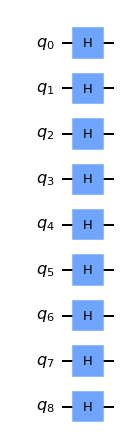

In [12]:
grover_circuit = initialize(grover_circuit, n)
grover_circuit.draw(output='mpl')

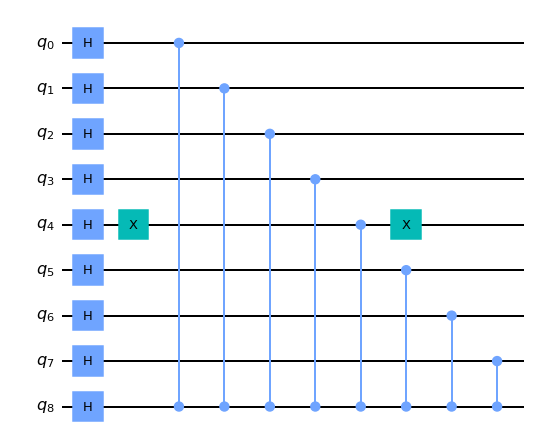

In [13]:
grover_circuit.x(4)
grover_circuit.cz(0, 8)
grover_circuit.cz(1, 8)
grover_circuit.cz(2, 8)
grover_circuit.cz(3, 8)
grover_circuit.cz(4, 8)
grover_circuit.cz(5, 8)
grover_circuit.cz(6, 8)
grover_circuit.cz(7, 8)
grover_circuit.x(4)

grover_circuit.draw(output='mpl')

In [14]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)

    for qubit in range(nqubits):
        qc.h(qubit)
    
    for qubit in range(nqubits):
        qc.x(qubit)
    
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    
    for qubit in range(nqubits):
        qc.x(qubit)
    
    for qubit in range(nqubits):
        qc.h(qubit)
    
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

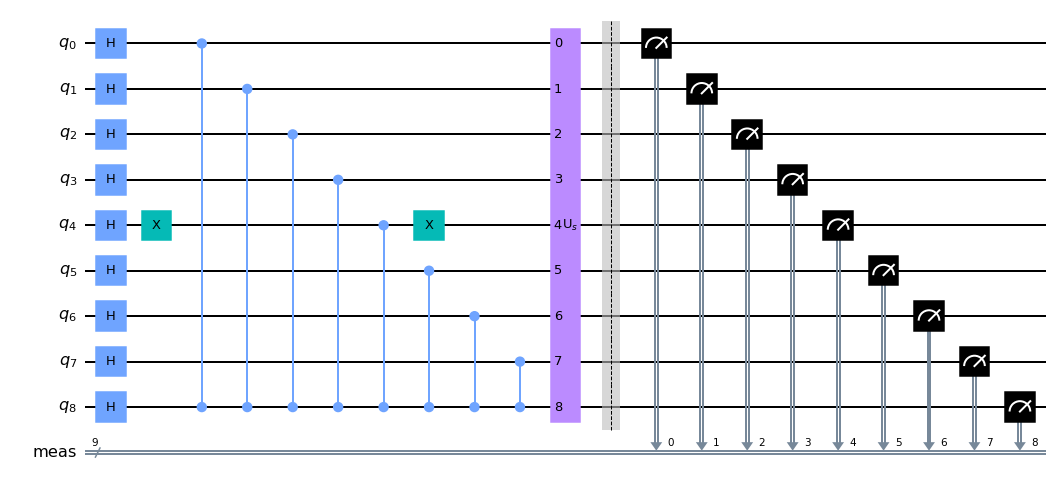

In [15]:
#grover_circuit.append(oracle_ex3, [0,1,2,3,4,5,6,7,8])
grover_circuit.append(diffuser(n), [0,1,2,3,4,5,6,7,8])
grover_circuit.measure_all()
grover_circuit.draw(output='mpl')

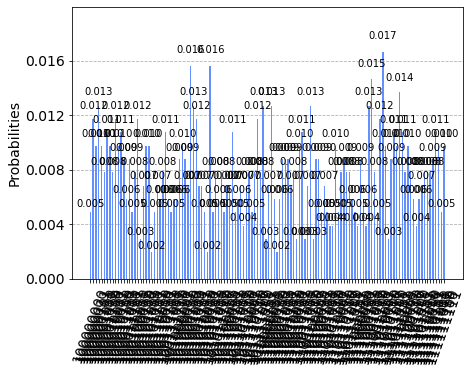

In [18]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(grover_circuit, qasm_sim)
qobj = assemble(transpiled_grover_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)